# Comparing data from SLHA files from interpolation with SLHA files from MG5

For the 2MDM analysis using SModelS, we decided to obtain the production cross-sections for both mediators via interpolation from a few MG5 points, we then obtained the Branching Ratios and generated the SLHA files to use as input in SModelS. Since we generated more than 50K SLHA files, using interpolation reduced significantly the time required to perform the analysis. 
In this Jupyter Notebook, we compare the points obtained with MG5 with the ones obtained via interpolation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)

#### Get data in pcl format

In [2]:
slhaFile = './smodels_results_slha_mg5_points.pcl'
mg5File = './mg5_scan.pcl'

slhaData = pd.read_pickle(slhaFile)
mg5Data = pd.read_pickle(mg5File)

#### Filter columns

In [3]:
columns = ['filename', 'mass.9000006', 'mass.9900032', 'mass.9900026', 
           'width.9000006', 'width.9900026', 'width.9900032', 
           'extpar.1', 'extpar.2', 'extpar.3', 'extpar.4', 'extpar.5', 'extpar.6', 'extpar.7', 
           'xsec8TeV(fb).9900032', 'xsec8TeV(fb).9900026', 'xsec13TeV(fb).9900032', 'xsec13TeV(fb).9900026', 
           'BRs.sd.W-,W+', 'BRs.sd.higgs,higgs', 'BRs.sd.Z,Z', 'BRs.sd.t-,t+', 'BRs.zp.b,b', 'BRs.zp.c,c', 
           'BRs.zp.q,q', 'BRs.zp.t-,t+', 'BRs.zp.chi,chi', 'BRs.sd.chi,chi', 'BRs.sd.ta+,ta-', 
           'totalxsec13TeV(fb)', 'totalxsec8TeV(fb)']

In [4]:
slhaData = slhaData[columns]

In [5]:
mg5Data = mg5Data[columns]

In [25]:
slhaData.sort_values(by=['mass.9900032'], inplace=True)
mg5Data.sort_values(by=['mass.9900032'], inplace=True)

#### Plot cross-sections and ratio between them

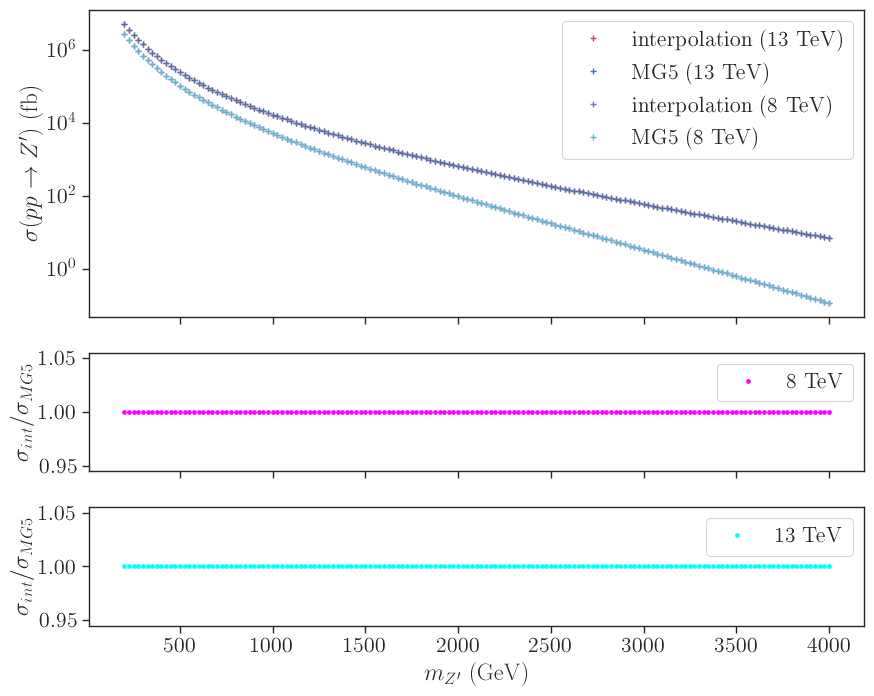

In [34]:
figs, ax = plt.subplots(3,sharex=True, gridspec_kw = {'height_ratios':[2.6, 1, 1]},figsize=(10,8))

# Plot Z prime x-section at 13 TeV
ax[0].plot(slhaData['mass.9900032'], slhaData['xsec13TeV(fb).9900032'], 'r+', 
           label=r'interpolation ($13$ TeV)')
ax[0].plot(mg5Data['mass.9900032'], mg5Data['xsec13TeV(fb).9900032'], 'b+', 
           label =r'MG5 ($13$ TeV)')

# Plot Z prime x-section at 8 TeV
ax[0].plot(slhaData['mass.9900032'], slhaData['xsec8TeV(fb).9900032'], 'm+', 
           label=r'interpolation ($8$ TeV)')
ax[0].plot(mg5Data['mass.9900032'], mg5Data['xsec8TeV(fb).9900032'], 'c+', 
           label =r'MG5 ($8$ TeV)')

ax[2].set_xlabel(r'$m_{Z^{\prime}}$ (GeV)')
ax[0].set_ylabel(r'$\sigma (p p \to Z^{\prime})$ (fb)')
ax[0].set_yscale('log')
ax[0].legend(loc='upper right')

# Plot ratios

ratio8 = np.array(mg5Data['xsec8TeV(fb).9900032'])/np.array(slhaData['xsec8TeV(fb).9900032'])
ax[1].plot(mg5Data['mass.9900032'], ratio8, marker='.', ls='', color='magenta', label=r'$8$ TeV')

ax[1].set_ylabel(r'$\sigma_{int}/\sigma_{MG5}$')
ax[1].legend(loc='upper right')

ratio13 = np.array(mg5Data['xsec13TeV(fb).9900032'])/np.array(slhaData['xsec13TeV(fb).9900032'])
ax[2].plot(mg5Data['mass.9900032'], ratio8, marker='.', ls='', color='cyan', label=r'$13$ TeV')

ax[2].set_ylabel(r'$\sigma_{int}/\sigma_{MG5}$')
ax[2].legend(loc='upper right')

plt.show()

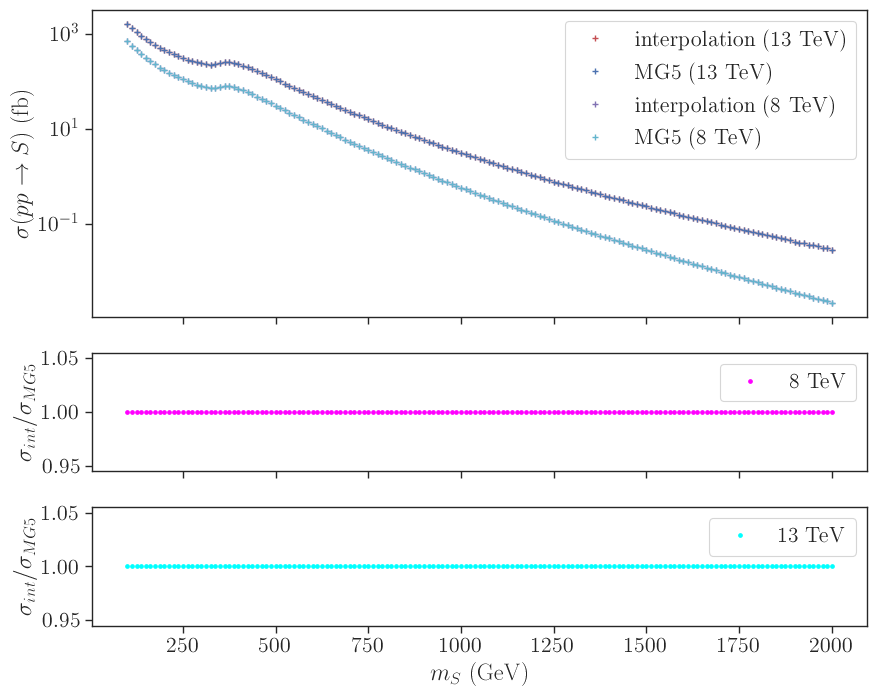

In [37]:
figs, ax = plt.subplots(3,sharex=True, gridspec_kw = {'height_ratios':[2.6, 1, 1]},figsize=(10,8))

# Plot S x-section at 13 TeV
ax[0].plot(slhaData['mass.9900026'], slhaData['xsec13TeV(fb).9900026'], 'r+', 
           label=r'interpolation ($13$ TeV)')
ax[0].plot(mg5Data['mass.9900026'], mg5Data['xsec13TeV(fb).9900026'], 'b+', 
           label =r'MG5 ($13$ TeV)')

# Plot Z prime x-section at 8 TeV
ax[0].plot(slhaData['mass.9900026'], slhaData['xsec8TeV(fb).9900026'], 'm+', 
           label=r'interpolation ($8$ TeV)')
ax[0].plot(mg5Data['mass.9900026'], mg5Data['xsec8TeV(fb).9900026'], 'c+', 
           label =r'MG5 ($8$ TeV)')

ax[2].set_xlabel(r'$m_{S}$ (GeV)')
ax[0].set_ylabel(r'$\sigma (p p \to S)$ (fb)')
ax[0].set_yscale('log')
ax[0].legend(loc='upper right')

# Plot ratios

ratio8 = np.array(mg5Data['xsec8TeV(fb).9900026'])/np.array(slhaData['xsec8TeV(fb).9900026'])
ax[1].plot(mg5Data['mass.9900026'], ratio8, marker='.', ls='', color='magenta', label=r'$8$ TeV')

ax[1].set_ylabel(r'$\sigma_{int}/\sigma_{MG5}$')
ax[1].legend(loc='upper right')

ratio13 = np.array(mg5Data['xsec13TeV(fb).9900026'])/np.array(slhaData['xsec13TeV(fb).9900026'])
ax[2].plot(mg5Data['mass.9900026'], ratio8, marker='.', ls='', color='cyan', label=r'$13$ TeV')

ax[2].set_ylabel(r'$\sigma_{int}/\sigma_{MG5}$')
ax[2].legend(loc='upper right')

plt.show()

#### Plot BRs

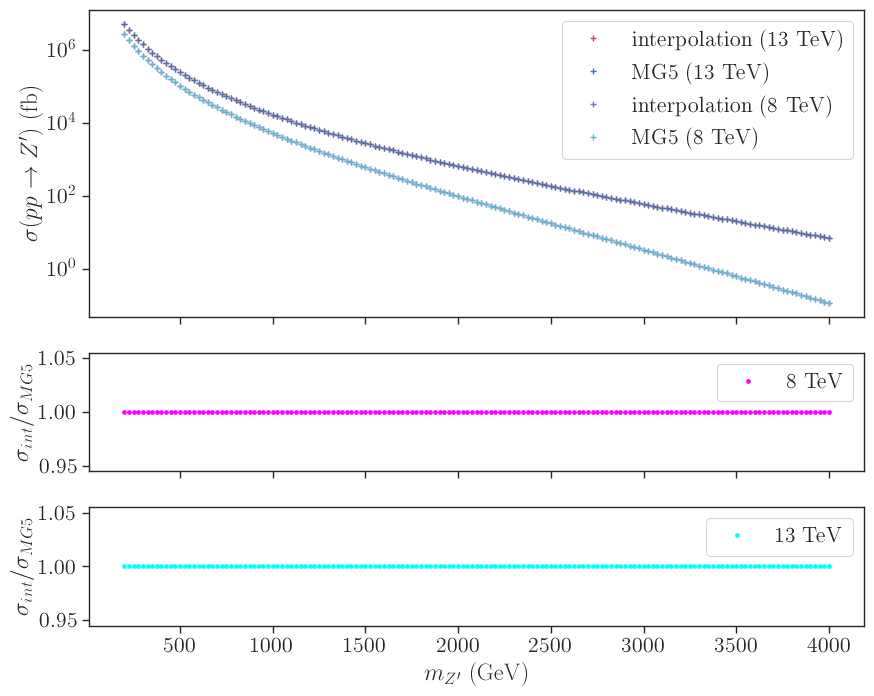

In [34]:
figs, ax = plt.subplots(3,sharex=True, gridspec_kw = {'height_ratios':[2.2, 1, 1]},figsize=(10,8))

# Plot Z prime x-section at 13 TeV
ax[0].plot(slhaData['mass.9900032'], slhaData['xsec13TeV(fb).9900032'], 'r+', 
           label=r'interpolation ($13$ TeV)')
ax[0].plot(mg5Data['mass.9900032'], mg5Data['xsec13TeV(fb).9900032'], 'b+', 
           label =r'MG5 ($13$ TeV)')

# Plot Z prime x-section at 8 TeV
ax[0].plot(slhaData['mass.9900032'], slhaData['xsec8TeV(fb).9900032'], 'm+', 
           label=r'interpolation ($8$ TeV)')
ax[0].plot(mg5Data['mass.9900032'], mg5Data['xsec8TeV(fb).9900032'], 'c+', 
           label =r'MG5 ($8$ TeV)')

ax[2].set_xlabel(r'$m_{Z^{\prime}}$ (GeV)')
ax[0].set_ylabel(r'$\sigma (p p \to Z^{\prime})$ (fb)')
ax[0].set_yscale('log')
ax[0].legend(loc='upper right')

# Plot ratios

ratio8 = np.array(mg5Data['xsec8TeV(fb).9900032'])/np.array(slhaData['xsec8TeV(fb).9900032'])
ax[1].plot(mg5Data['mass.9900032'], ratio8, marker='.', ls='', color='magenta', label=r'$8$ TeV')

ax[1].set_ylabel(r'$\sigma_{int}/\sigma_{MG5}$')
ax[1].legend(loc='upper right')

ratio13 = np.array(mg5Data['xsec13TeV(fb).9900032'])/np.array(slhaData['xsec13TeV(fb).9900032'])
ax[2].plot(mg5Data['mass.9900032'], ratio8, marker='.', ls='', color='cyan', label=r'$13$ TeV')

ax[2].set_ylabel(r'$\sigma_{int}/\sigma_{MG5}$')
ax[2].legend(loc='upper right')

plt.show()

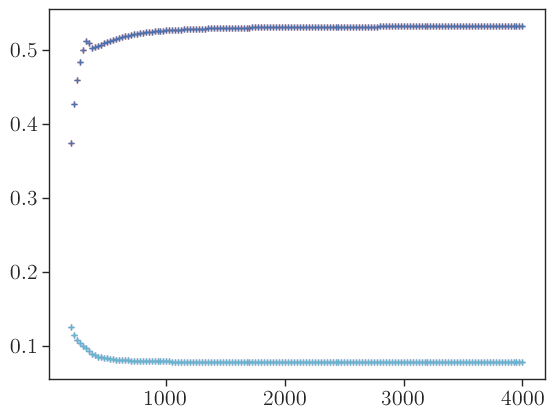

In [48]:
plt.plot(slhaData['mass.9900032'], slhaData['BRs.zp.chi,chi'], 'r+')
plt.plot(mg5Data['mass.9900032'], mg5Data['BRs.zp.chi,chi'], 'b+')

plt.plot(slhaData['mass.9900032'], slhaData['BRs.zp.q,q'], 'm+')
plt.plot(mg5Data['mass.9900032'], mg5Data['BRs.zp.q,q'], 'c+')

plt.show()

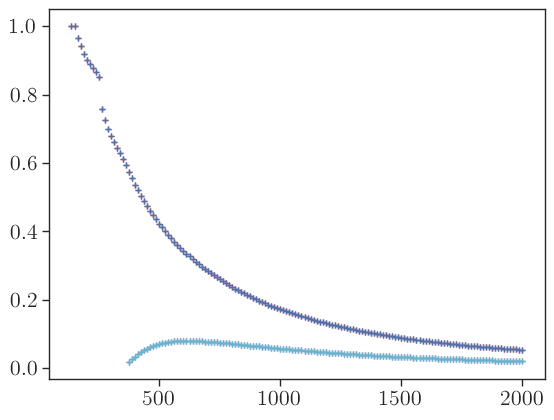

In [49]:
plt.plot(slhaData['mass.9900026'], slhaData['BRs.sd.chi,chi'], 'r+')
plt.plot(mg5Data['mass.9900026'], mg5Data['BRs.sd.chi,chi'], 'b+')

plt.plot(slhaData['mass.9900026'], slhaData['BRs.sd.t-,t+'], 'm+')
plt.plot(mg5Data['mass.9900026'], mg5Data['BRs.sd.t-,t+'], 'c+')

plt.show()